## Vignette: asking and answering a predictive question

by Mike Gelbart, Assistant Professor of Teaching @ UBC Department of Computer Science

Presented for Data Science & Health 2020

In [1]:
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline


Task: Predicting the presence or absence of heart disease (the target) based on a set of 13 different biophysical measures (the features). 

Dataset: from UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Heart+Disease 


In [2]:
heart_df = pd.read_csv("heart_disease.csv", index_col=0)

In [3]:
df_train, df_test = train_test_split(heart_df, random_state=123)

In [4]:
df_train

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
patient_id,,,,,,,,,,,,,,
36,54,female,non-anginal pain,135,304,greater than 120mg/ml,abnormal,170,no,0.0,downsloping,0,normal,1
148,44,male,non-anginal pain,120,226,lower than 120mg/ml,abnormal,169,no,0.0,downsloping,0,normal,1
21,44,male,non-anginal pain,130,233,lower than 120mg/ml,abnormal,179,yes,0.4,downsloping,0,normal,1
187,54,male,angina,124,266,lower than 120mg/ml,normal,109,yes,2.2,flat,1,abnormal,0
161,55,female,non-anginal pain,132,342,lower than 120mg/ml,abnormal,166,no,1.2,downsloping,0,normal,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,69,male,non-anginal pain,160,234,greater than 120mg/ml,normal,131,no,0.1,flat,1,normal,1
83,52,male,non-anginal pain,152,298,greater than 120mg/ml,abnormal,178,no,1.2,flat,0,abnormal,1
17,66,female,non-anginal pain,150,226,lower than 120mg/ml,abnormal,114,no,2.6,upsloping,0,normal,1


In [5]:
df_train['target'].value_counts()

1    128
0     99
Name: target, dtype: int64

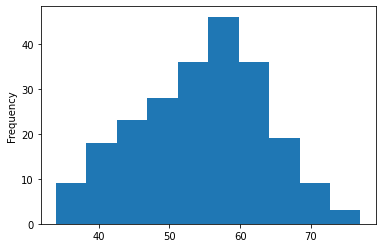

In [6]:
df_train['age'].plot.hist();

In [7]:
numeric_features = [
    "age",
    "resting_blood_pressure",
    "cholesterol",
    "max_heart_rate_achieved",
    "st_depression",
    "num_major_vessels",
]
categorical_features = [
    "sex",
    "chest_pain_type",
    "fasting_blood_sugar",
    "rest_ecg",
    "exercise_induced_angina",
    "st_slope",
    "thalassemia",
]

In [8]:
X_train = df_train.drop(columns=["target"])
y_train = df_train["target"]
    
X_test = df_test.drop(columns=["target"])
y_test = df_test["target"]

In [9]:
df_train["st_slope"]

patient_id
36     downsloping
148    downsloping
21     downsloping
187           flat
161    downsloping
          ...     
106           flat
83            flat
17       upsloping
230    downsloping
98     downsloping
Name: st_slope, Length: 227, dtype: object

In [10]:
preprocessor = ColumnTransformer([
    ("scale", StandardScaler(), numeric_features),
    ("ohe", OneHotEncoder(), categorical_features),
])
preprocessor.fit(X_train)
new_columns = numeric_features + list(preprocessor.named_transformers_["ohe"].get_feature_names(categorical_features))
X_train_enc = pd.DataFrame(preprocessor.transform(X_train), columns=new_columns, index=X_train.index)
X_train_enc

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels,sex_female,sex_male,chest_pain_type_angina,chest_pain_type_non-anginal pain,...,fasting_blood_sugar_lower than 120mg/ml,rest_ecg_abnormal,rest_ecg_normal,exercise_induced_angina_no,exercise_induced_angina_yes,st_slope_downsloping,st_slope_flat,st_slope_upsloping,thalassemia_abnormal,thalassemia_normal
patient_id,,,,,,,,,,,,,,,,,,,,,
36,-0.057019,0.213311,1.033292,0.861754,-0.900071,-0.715888,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
148,-1.163276,-0.706088,-0.414936,0.818128,-0.900071,-0.715888,0.0,1.0,0.0,1.0,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
21,-1.163276,-0.093155,-0.284967,1.254386,-0.525523,-0.715888,0.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
187,-0.057019,-0.460915,0.327745,-1.799420,1.159945,0.293470,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
161,0.053607,0.029432,1.738839,0.687250,0.223574,-0.715888,1.0,0.0,0.0,1.0,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,1.602368,1.745644,-0.266400,-0.839652,-0.806434,0.293470,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
83,-0.278270,1.255298,0.921890,1.210760,0.223574,-0.715888,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
17,1.270490,1.132711,-0.414936,-1.581291,1.534493,-0.715888,1.0,0.0,0.0,1.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


In [11]:
pipe = make_pipeline(preprocessor, LogisticRegressionCV())

In [12]:
cross_val_score(pipe, X_train, y_train, cv=20).mean()

0.868560606060606

<br><br>

In [13]:
pipe.fit(X_train, y_train);

In [14]:
X_test[:1]

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia
patient_id,,,,,,,,,,,,,
11,48,female,non-anginal pain,130,275,lower than 120mg/ml,abnormal,139,no,0.2,downsloping,0,normal


In [15]:
pipe.predict(X_test[:1])

array([1])

In [16]:
pipe.predict_proba(X_test[:1])

array([[0.10810309, 0.89189691]])

In [17]:
y_test[:1]

patient_id
11    1
Name: target, dtype: int64

In [18]:
pipe.score(X_test, y_test)

0.8026315789473685

## Challenges

Type of data:

- Images
- Videos
- Text
- Time series
- Censored data (survival analysis)
- ...

<br><br><br><br>

Data quality:

- Missing data
- Incorrect data
- Outliers
- ...

<br><br><br><br>

Data quantity:

- Need lots of data to get this to work
- For this type of analysis, need **labeled** data

<br><br><br><br>

Computational issues:

- Code may take a long time to run?
- Do we need distributed / cloud computing?
- Are the tools actively maintained?
- ...

<br><br><br><br>

Error metrics: 

- False positive vs. false negatives (sensitivity vs. specificity)
- ...

<br><br><br><br>

Ethical challenges:

- How confident are we really in our results? 
- Can we trust it if we don't understand it?
- Relevant article: https://medium.com/@jrzech/what-are-radiological-deep-learning-models-actually-learning-f97a546c5b98
- Is our model biased? 

<br><br><br><br>

## Where to learn more data science at UBC?

- https://extendedlearning.ubc.ca/programs/key-capabilities-data-science and https://prog-learn.mds.ubc.ca/en
- https://masterdatascience.ubc.ca/
- DSCI 100, CPSC 330
- Upcoming undergraduate courses